In [96]:
import numpy as np
import pandas as pd
from scipy.misc import imread,imsave
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
from skimage.transform import resize
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
import os

In [97]:
os.chdir('/scratch0/datasets/NYC3dcars/')
datasets=pd.read_csv('nyc3dcars-csv/datasets.csv')
photos=pd.read_pickle('nyc3dcars-csv/preprocessed_photos')
vehicles=pd.read_csv('nyc3dcars-csv/vehicles.csv')
vehicle_types=pd.read_csv('nyc3dcars-csv/vehicle_types.csv')
vehicles.drop(vehicles.columns[[13,14]], axis=1, inplace=True)
photos1=photos[['id', 'filename','width', 'height','roll','sees_ground', 'camera_height','test', 'dataset_id','daytime']]
photos1 = photos1.rename(columns={'id': 'pid'})
photos1

pid                                           filename  width  height  \
0      111                  images/119813548_a248fe4443_o.jpg   1600    1201   
1      112                  images/119813590_48f5b04e3d_o.jpg   1600    1201   
2      113                  images/119813653_779ad9785b_o.jpg   1600    1201   
3      115                  images/119818247_99c2f08783_o.jpg   1600    1201   
4      117                  images/119818330_9d06687635_o.jpg   1600    1201   
5      118                  images/119818364_61bcf0894d_o.jpg   1600    1201   
6      119                  images/119818399_d25b4fdc79_o.jpg   1600    1201   
7      120                  images/119818442_71a0813862_o.jpg   1600    1201   
8      121                  images/119818456_5cb3b62ea4_o.jpg   1600    1201   
9      122                  images/119818486_3b7ccac750_o.jpg   1600    1201   
10     123                  images/119818516_def3cac6c6_o.jpg   1600    1201   
11      17                 images/1015162729_676da9ff19_o.jpg   1600    1143   
12      23                 images/1019904557_a03df6e3c7_o.jpg   1600    1071   
13      27                 images/1022199595_5235bc88ab_o.jpg   1280     960   
14      63                 images/1087769829_9203c5af93_o.jpg    960    1280   
15      80                 images/1138169323_72fb480ebe_o.jpg   1024     768   
16     852                 images/2175217429_7a2a71f696_o.jpg   1600    1064   
17     873                 images/2175979136_258e68e97e_o.jpg   1600    1066   
18     874                 images/2175980616_6f380bd876_o.jpg   1066    1600   
19     875                 images/2175982096_2c2e9bea67_o.jpg   1600    1066   
20     877                 images/2175993838_17d408f71c_o.jpg   1600    1066   
21     878                 images/2176014658_e5e702cc04_o.jpg   1600    1066   
22     879                 images/2176019130_1710d187bf_o.jpg   1600    1066   
23    2176                 images/2673139776_9667390cea_o.jpg    533     800   
24    2562                 images/2826480151_da6b59ee66_o.jpg   1600    1200   
25    2563                 images/2827320178_cda54b6c45_o.jpg   1600    1200   
26    2564                 images/2827325800_0ab4a96083_o.jpg   1600    1200   
27    2566                 images/2831585381_c99bbec418_o.jpg    533     800   
28    2568                 images/2831585607_e0a9246881_o.jpg    541     800   
29    2577                 images/2832423262_88e7d0827a_o.jpg    533     800   
...    ...                                                ...    ...     ...   
5286  3243                 images/3078940344_7016be966a_o.jpg   1200    1600   
5287  5161                   images/95680715_ca6f823fd6_o.jpg   1600    1200   
5288  4202                 images/3699339012_d967d23dd6_o.jpg    620     415   
5289  4550                 images/4162243453_7a14748eb6_o.jpg   1600    1200   
5290  2585                 images/2838576521_44130dda53_o.jpg   1600    1200   
5291  5159                   images/95680669_883a667746_o.jpg   1600    1200   
5292  5160                   images/95680697_d073292c49_o.jpg   1600    1200   
5293   828                 images/2170676829_0f9e009dc5_o.jpg   1067    1600   
5294  5196  images/gsv/1388.0/40.757224_-73.986091_150.671...    936     537   
5295  5213  images/gsv/1388.0/40.757364_-73.985984_211.430...    936     537   
5296  5214  images/gsv/1388.0/40.757364_-73.985984_262.858...    936     537   
5297  5217  images/gsv/1388.0/40.757364_-73.985984_5.7157_...    936     537   
5298  5220  images/gsv/1388.0/40.757369_-73.986069_236.207...    936     537   
5299  5218  images/gsv/1388.0/40.757369_-73.986069_133.350...    936     537   
5300  5219  images/gsv/1388.0/40.757369_-73.986069_184.778...    936     537   
5301  5329  images/gsv/1388.0/40.758354_-73.985467_253.218...    936     537   
5302  5191  images/gsv/1388.0/40.756950_-73.986295_3.0457_...    936     537   
5303  5189  images/gsv/1388.0/40.756950_-73.986295_157.331...    936     537   
5304  5

In [98]:
right_result=pd.merge(photos1, vehicles, how='inner', on='pid',
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [99]:
right_result['area_bb'] = right_result.apply(lambda row: (min(row.x2,1)-max(row.x1,0))*(min(row.y2,1)-max(row.y1,0)), axis=1)
print(right_result.loc[1])
print('Stats (Mean,Max,Min): {0:.3f}, {1:.3f}, {2:.6f}'.format(right_result['area_bb'].mean(),right_result['area_bb'].max(),right_result['area_bb'].min()))

pid                                               4
filename         images/1010743959_40eb8ce130_o.jpg
width                                          1142
height                                         1600
roll                                     -0.0389082
sees_ground                                       t
camera_height                               2.99029
test                                              t
dataset_id                                        1
daytime                                           f
id                                             6911
x                                          -24.4368
z                                          -4.44338
theta                                       20.1272
x1                                         0.272522
y1                                         0.889146
x2                                         0.529257
y2                                         0.948775
occlusion                                         2
view_theta  

In [100]:
right_result['area_bb'].mean(),right_result['area_bb'].max(),right_result['area_bb'].min()

(0.016738567332775237, 1.0, 0.0002628030374829229)

In [101]:
np.mean(list(right_result['width'])),np.mean(list(right_result['height']))

(1261.5497200746468, 1133.8579045587844)

In [102]:
k=0.2
threshold=k*right_result['area_bb'].mean()
right_result=right_result.loc[right_result['area_bb']>=threshold]

In [103]:
right_result.shape

(2687, 23)

test=right_result#.loc[right_result['occlusion']<=1]
test=test.sort_values(by=['area_bb'])
k=0.2
threshold=k*right_result['area_bb'].mean()
test_1=test.loc[test['area_bb']<threshold]
test_2=test.loc[test['area_bb']>=threshold]
print(test_1.shape,test_2.shape,test.shape)

test_2.iloc[:len(test_2)-150,:].shape

test_1[['pid','id','area_bb','occlusion']]

In [104]:
right_result_temp=right_result
right_result1=right_result_temp.loc[right_result_temp['occlusion']<=1]
right_result1.index = np.arange(0, len(right_result1))
right_result2=right_result_temp.loc[right_result_temp['occlusion']>1]
right_result2.index = np.arange(0, len(right_result2))

In [105]:
right_result1.shape,right_result2.shape,right_result.shape

((965, 23), (1722, 23), (2687, 23))

In [106]:
theta_test=[right_result2.loc[i,'view_theta'] for i in range(0,right_result2.shape[0])]
phi_test=[right_result2.loc[i,'view_phi'] for i in range(0,right_result2.shape[0])]
x_test=[right_result2.loc[i,'x'] for i in range(0,right_result2.shape[0])]
z_test=[right_result2.loc[i,'z'] for i in range(0,right_result2.shape[0])]
th_test=[right_result2.loc[i,'theta'] for i in range(0,right_result2.shape[0])]
occ_test=[right_result2.loc[i,'occlusion'] for i in range(0,right_result2.shape[0])]
cam_height_test=[right_result2.loc[i,'camera_height'] for i in range(0,right_result2.shape[0])]
daytime_test=[right_result2.loc[i,'daytime'] for i in range(0,right_result2.shape[0])]

filenames_test=[right_result2.loc[i,'filename'] for i in range(0,right_result2.shape[0])]
pids_test=[right_result2.loc[i,'pid'] for i in range(0,right_result2.shape[0])]
vids_test=[right_result2.loc[i,'id'] for i in range(0,right_result2.shape[0])]

X_test=np.zeros((right_result2.shape[0],7),dtype=np.float32)
for i in range(0,right_result2.shape[0]):
    X_test[i,0]=theta_test[i]
    X_test[i,1]=phi_test[i]
    X_test[i,2]=x_test[i]
    X_test[i,3]=z_test[i]
    X_test[i,4]=th_test[i]
    X_test[i,5]=cam_height_test[i]
    X_test[i,6]=int(daytime_test[i]=='t')

In [107]:
def stats(a):
    return max(a),min(a)
def normalized(a,ma,mi,normalized_param=1):
    if(normalized_param):
        return (a-mi)/(ma-mi)
    else:
        return a
def find_indices(X,dim=6,value=1.0):
    indices=[]
    for i in range(len(X)):
        if(X[i,dim]==value):
            indices.append(i)
    return indices

In [108]:
theta=[right_result1.loc[i,'view_theta'] for i in range(0,right_result1.shape[0])]
phi=[right_result1.loc[i,'view_phi'] for i in range(0,right_result1.shape[0])]
x=[right_result1.loc[i,'x'] for i in range(0,right_result1.shape[0])]
z=[right_result1.loc[i,'z'] for i in range(0,right_result1.shape[0])]
th=[right_result1.loc[i,'theta'] for i in range(0,right_result1.shape[0])]
occ=[right_result1.loc[i,'occlusion'] for i in range(0,right_result1.shape[0])]
cam_height=[right_result1.loc[i,'camera_height'] for i in range(0,right_result1.shape[0])]
daytime=[right_result1.loc[i,'daytime'] for i in range(0,right_result1.shape[0])]

filenames=[right_result1.loc[i,'filename'] for i in range(0,right_result1.shape[0])]
pids=[right_result1.loc[i,'pid'] for i in range(0,right_result1.shape[0])]
vids=[right_result1.loc[i,'id'] for i in range(0,right_result1.shape[0])]

theta_max,theta_min=stats(theta)
phi_max,phi_min=stats(phi)
x_max,x_min=stats(x)
z_max,z_min=stats(z)
th_max,th_min=stats(th)
cam_height_max,cam_height_min=stats(cam_height)

X=np.zeros((right_result1.shape[0],7),dtype=np.float32)
normalized_param=1
for i in range(0,right_result1.shape[0]):
    X[i,0]=normalized(theta[i],theta_max,theta_min,normalized_param)
    X[i,1]=normalized(phi[i],phi_max,phi_min,normalized_param)
    X[i,2]=normalized(x[i],x_max,x_min,normalized_param)
    X[i,3]=normalized(z[i],z_max,z_min,normalized_param)
    X[i,4]=normalized(th[i],th_max,th_min,normalized_param)
    X[i,5]=normalized(cam_height[i],cam_height_max,cam_height_min,normalized_param)
    X[i,6]=int(daytime[i]=='t')

In [109]:
ind0=find_indices(X,dim=6,value=0.0)
ind1=find_indices(X,dim=6,value=1.0)
X0=X[ind0]
X1=X[ind1]
pids0=[pids[i] for i in ind0]
pids1=[pids[i] for i in ind1]
vids0=[vids[i] for i in ind0]
vids1=[vids[i] for i in ind1]

In [110]:
nbrs1 = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X1)
nbrs0 = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(X0)
distances0, indices0 = nbrs0.kneighbors(X0)
distances1, indices1 = nbrs1.kneighbors(X1)

In [111]:
indices1,indices0

(array([[  0,  74, 103, 350,  72, 311],
        [  1, 262, 422, 312, 128, 260],
        [  2, 241, 155,  54, 188, 243],
        ...,
        [545, 502, 297, 291, 493, 546],
        [546, 493, 538, 291, 492, 464],
        [547, 462, 463, 492, 476, 500]]),
 array([[  0, 370, 276,  32, 390, 335],
        [  1,  51,  25,  44, 357, 115],
        [  2, 323,  92, 178,  16,  34],
        ...,
        [414,  29,  71, 375, 357, 205],
        [415, 308,  74, 148,  44, 214],
        [416, 244, 261,  50, 136, 242]]))

/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the

Day Completed


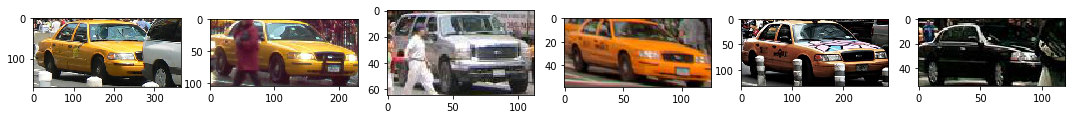

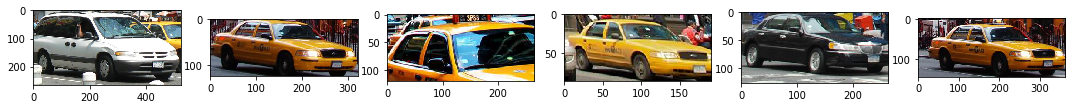

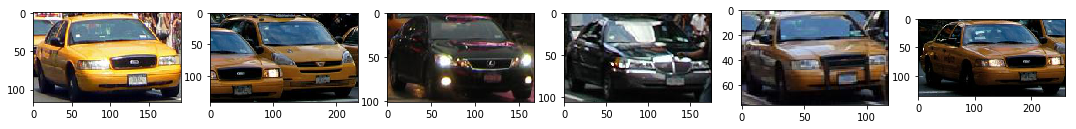

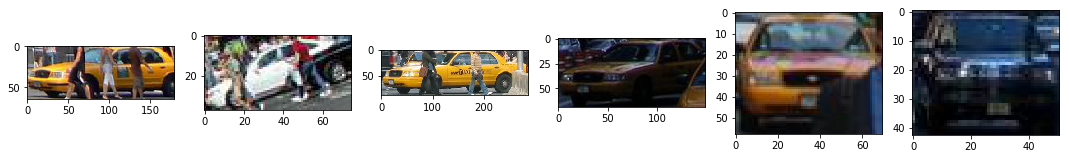

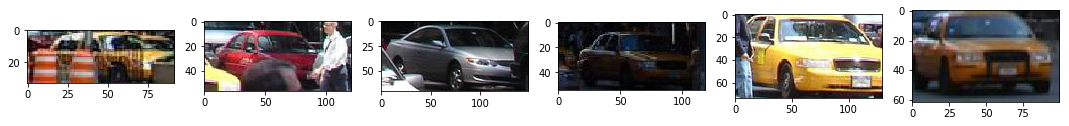

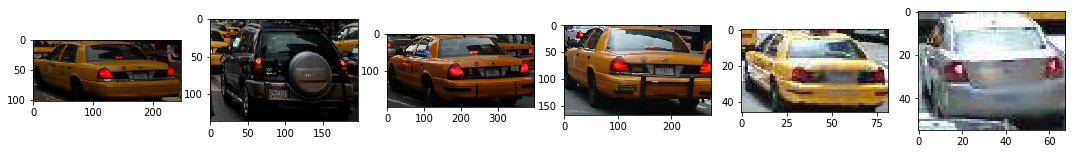

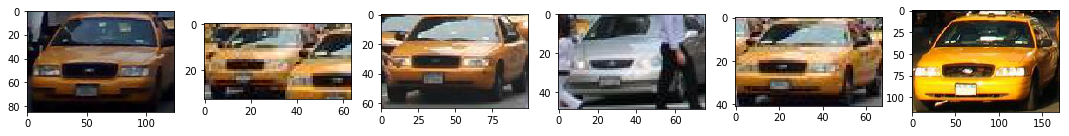

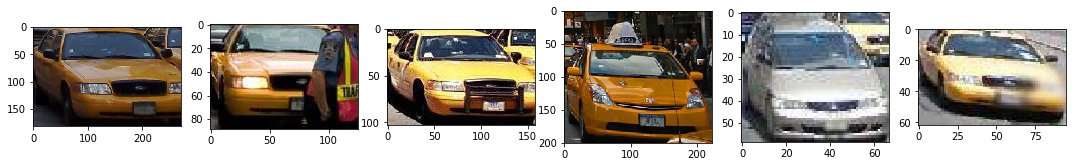

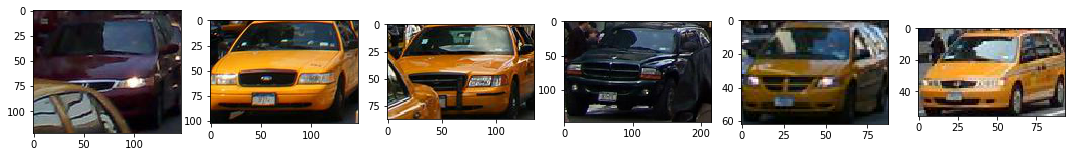

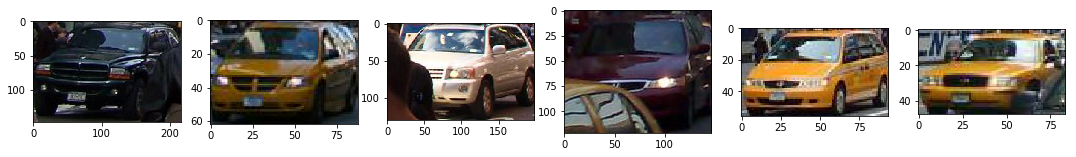

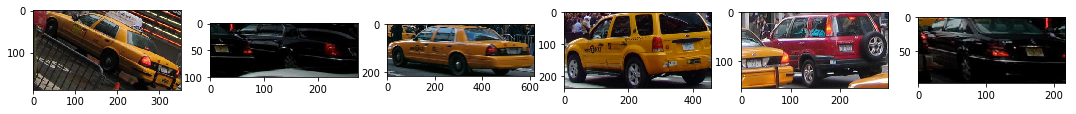

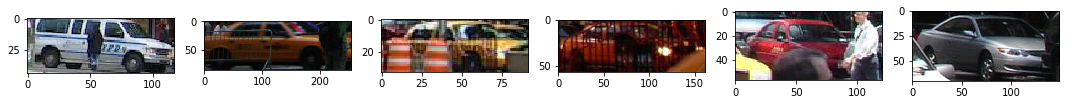

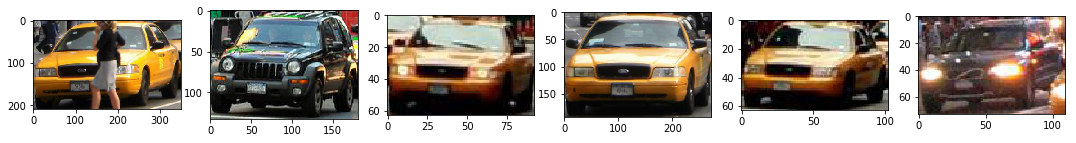

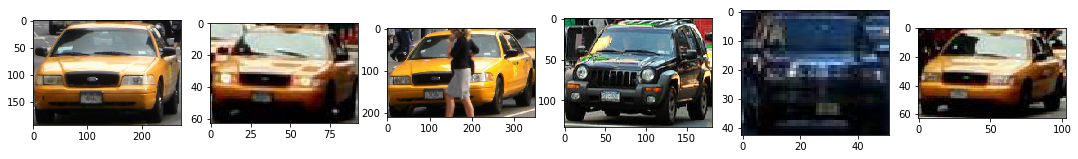

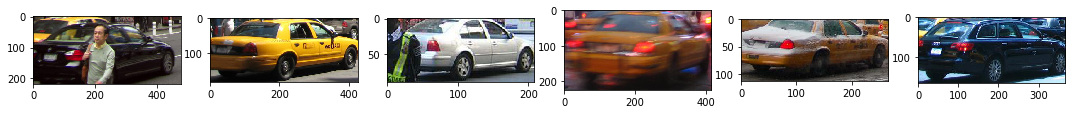

In [112]:
indices=indices1
pids=pids1
vids=vids1
for i in range(15):
    fig=plt.figure()
    fig.set_size_inches(18.5,10.5)
    fig.add_subplot(1,6,1).imshow(imread('all_cars/original/'+str(pids[indices[i,0]])+'_'+str(vids[indices[i,0]])+'.jpg'))
    fig.add_subplot(1,6,2).imshow(imread('all_cars/original/'+str(pids[indices[i,1]])+'_'+str(vids[indices[i,1]])+'.jpg'))
    fig.add_subplot(1,6,3).imshow(imread('all_cars/original/'+str(pids[indices[i,2]])+'_'+str(vids[indices[i,2]])+'.jpg'))
    fig.add_subplot(1,6,4).imshow(imread('all_cars/original/'+str(pids[indices[i,3]])+'_'+str(vids[indices[i,3]])+'.jpg'))
    fig.add_subplot(1,6,5).imshow(imread('all_cars/original/'+str(pids[indices[i,4]])+'_'+str(vids[indices[i,4]])+'.jpg'))
    fig.add_subplot(1,6,6).imshow(imread('all_cars/original/'+str(pids[indices[i,5]])+'_'+str(vids[indices[i,5]])+'.jpg'))

print('Day Completed')

/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/scratch0/anaconda2/envs/torch_py2.7/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the

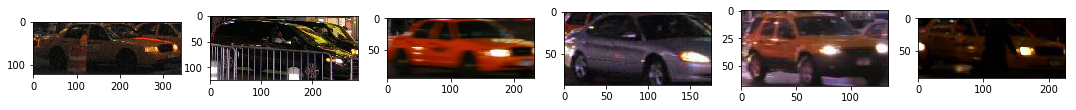

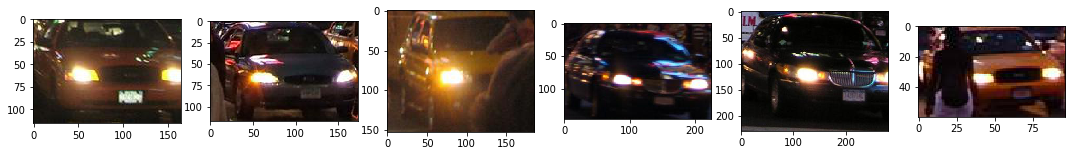

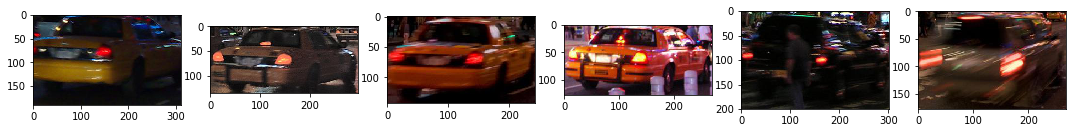

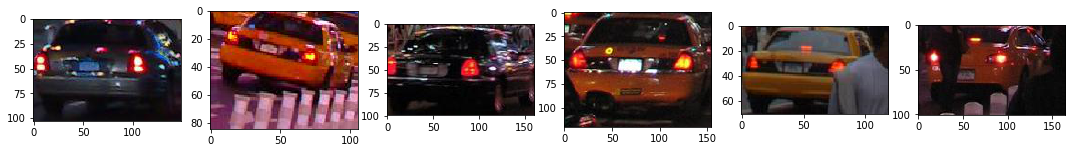

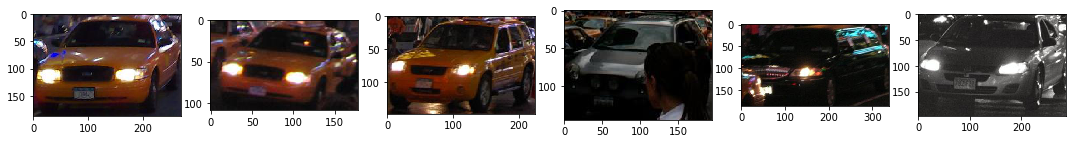

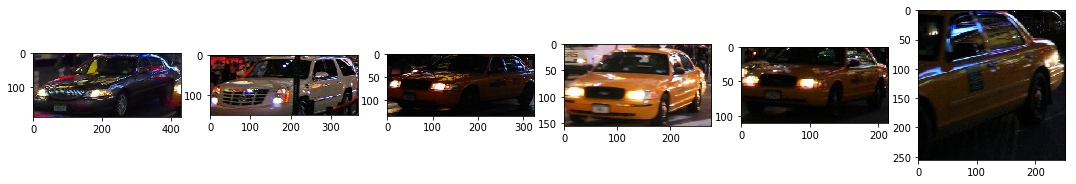

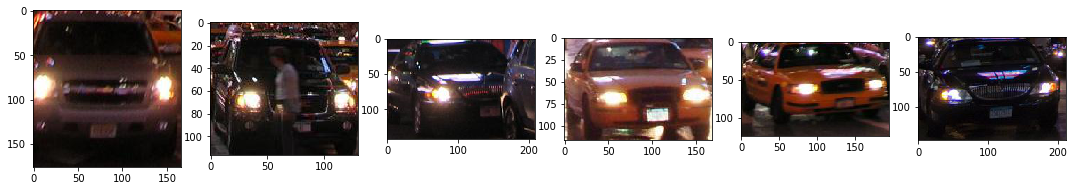

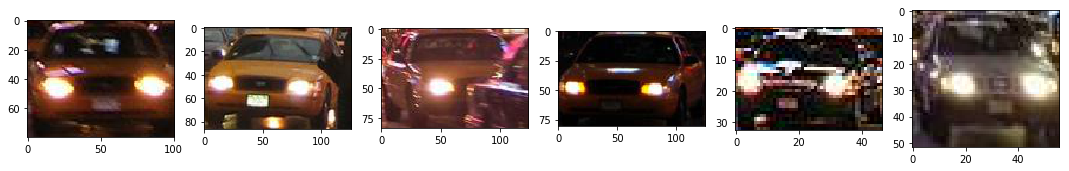

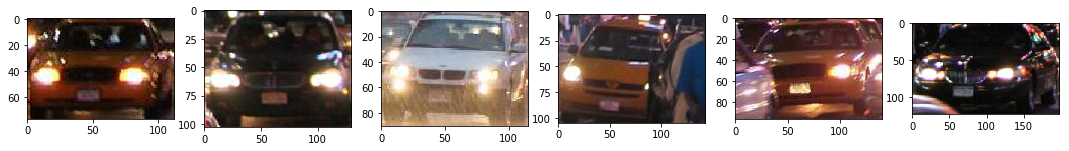

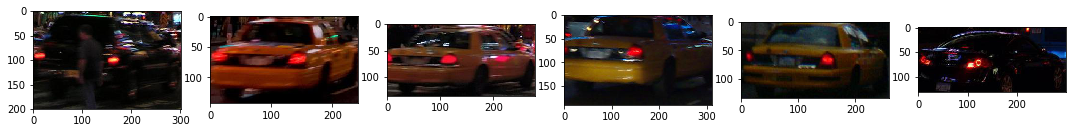

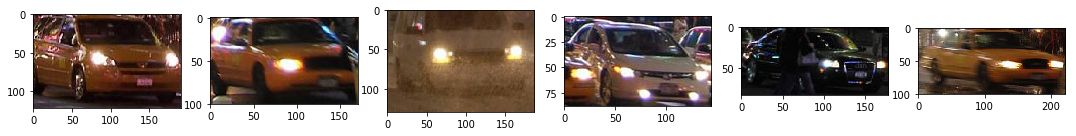

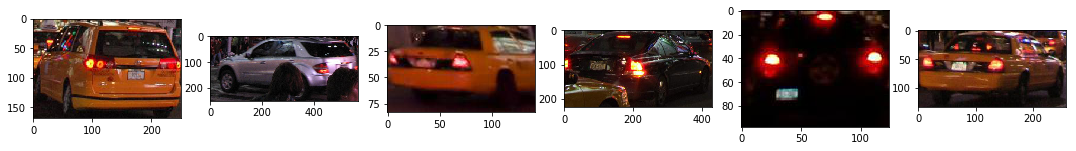

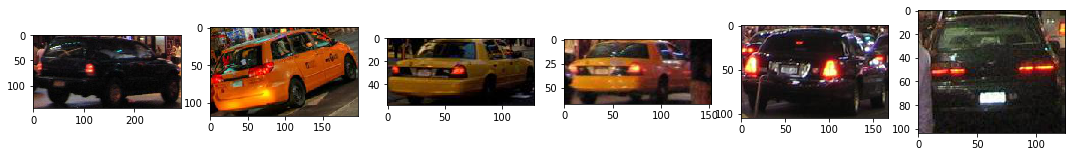

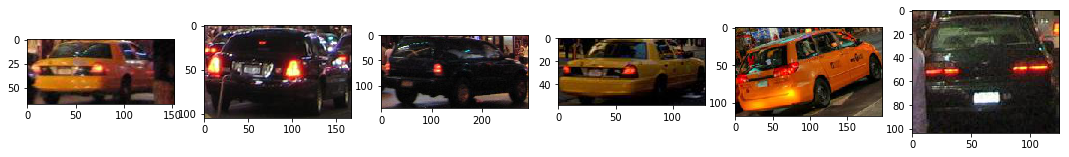

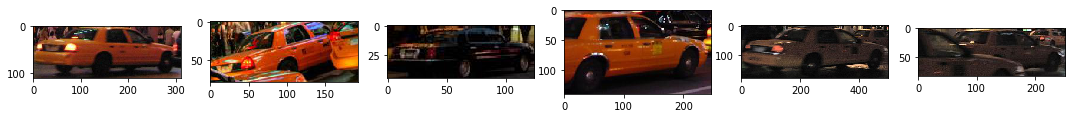

In [94]:
indices=indices0
pids=pids0
vids=vids0
for i in range(15):
    fig=plt.figure()
    fig.set_size_inches(18.5,10.5)
    fig.add_subplot(1,6,1).imshow(imread('all_cars/original/'+str(pids[indices[i,0]])+'_'+str(vids[indices[i,0]])+'.jpg'))
    fig.add_subplot(1,6,2).imshow(imread('all_cars/original/'+str(pids[indices[i,1]])+'_'+str(vids[indices[i,1]])+'.jpg'))
    fig.add_subplot(1,6,3).imshow(imread('all_cars/original/'+str(pids[indices[i,2]])+'_'+str(vids[indices[i,2]])+'.jpg'))
    fig.add_subplot(1,6,4).imshow(imread('all_cars/original/'+str(pids[indices[i,3]])+'_'+str(vids[indices[i,3]])+'.jpg'))
    fig.add_subplot(1,6,5).imshow(imread('all_cars/original/'+str(pids[indices[i,4]])+'_'+str(vids[indices[i,4]])+'.jpg'))
    fig.add_subplot(1,6,6).imshow(imread('all_cars/original/'+str(pids[indices[i,5]])+'_'+str(vids[indices[i,5]])+'.jpg'))

In [ ]:
distances_test,indices_test=nbrs.kneighbors(X_test)

In [ ]:
indices_test

In [ ]:
for i in range(100):
    fig=plt.figure()
    fig.set_size_inches(18.5,10.5)
    fig.add_subplot(1,7,1).imshow(imread('all_cars/original/'+str(pids_test[i])+'_'+str(vids_test[i])+'.jpg'))
    fig.add_subplot(1,7,2).imshow(imread('all_cars/original/'+str(pids[indices_test[i,0]])+'_'+str(vids[indices_test[i,0]])+'.jpg'))
    fig.add_subplot(1,7,2).imshow(imread('all_cars/original/'+str(pids[indices_test[i,1]])+'_'+str(vids[indices_test[i,1]])+'.jpg'))
    fig.add_subplot(1,7,3).imshow(imread('all_cars/original/'+str(pids[indices_test[i,2]])+'_'+str(vids[indices_test[i,2]])+'.jpg'))
    fig.add_subplot(1,7,4).imshow(imread('all_cars/original/'+str(pids[indices_test[i,3]])+'_'+str(vids[indices_test[i,3]])+'.jpg'))
    fig.add_subplot(1,7,5).imshow(imread('all_cars/original/'+str(pids[indices_test[i,4]])+'_'+str(vids[indices_test[i,4]])+'.jpg'))
    fig.add_subplot(1,7,6).imshow(imread('all_cars/original/'+str(pids[indices_test[i,5]])+'_'+str(vids[indices_test[i,5]])+'.jpg'))

In [ ]:
import matplotlib.patches as patches
from skimage.transform import resize
im=imread('times-square-images/images/1010743959_40eb8ce130_o.jpg')
fig,ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((128,1426),341,122,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

im_resized=resize(im,(1024,1024))
fig,ax = plt.subplots(1)
ax.imshow(im_resized)
rect = patches.Rectangle((115,913),306,78,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()


In [ ]:
right_result.loc[0,:]

In [ ]:
(-0.111705+0.410462)*1142

In [ ]:
(-0.891078+0.967445)*1600

In [ ]:
341.180494*1024.0/1142,128*1024.0/1142

In [ ]:
122.18719999999993*1024.0/1600,1426*1024.0/1600

In [ ]:
a='/scratch0/datasets/NYC3dcars/times-square-images/images/2557077810_1de00da7d3_o.jpg'

In [ ]:
import os
os.path.join(a.split('/')[-2],a.split('/')[-1])

In [ ]:
right_result

In [ ]:
right_result.sample(frac=1).reset_index(drop=True)